In [1]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import DBSCAN
import zipfile
import io, os
from tensorflow import keras
import matplotlib

import keras,os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import Dense, Flatten, Dropout
from keras.layers import MaxPooling2D
from keras.layers import MaxPool2D
from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint, EarlyStopping

from PIL import Image

from torchvision.models import resnet50, ResNet50_Weights
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import Dataset

KeyboardInterrupt: 

###Data Preparation

Unziping the files and loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Open the files for Chadene**

In [ ]:
zip_train_path = '/content/drive/MyDrive/Machine_learning/Final_project_Data/train_data_unlabeled.zip'
zip_test_path = '/content/drive/MyDrive/Machine_learning/Final_project_Data/test_data_unlabeled.zip'
with zipfile.ZipFile(zip_train_path, 'r') as zip_ref:
    zip_ref.extractall('/content/x_train')

with zipfile.ZipFile(zip_test_path, 'r') as zip_ref:
    zip_ref.extractall('/content/x_test')


**Open the files for Sacha**

In [ ]:
zip_train_path = '/content/drive/MyDrive/Mobilités/Machine Learning/Final Project/train_data_unlabeled.zip'
zip_test_path = '/content/drive/MyDrive/Mobilités/Machine Learning/Final Project/test_data_unlabeled.zip'
with zipfile.ZipFile(zip_train_path, 'r') as zip_ref:
    zip_ref.extractall('/content/x_train')

with zipfile.ZipFile(zip_test_path, 'r') as zip_ref:
    zip_ref.extractall('/content/x_test')


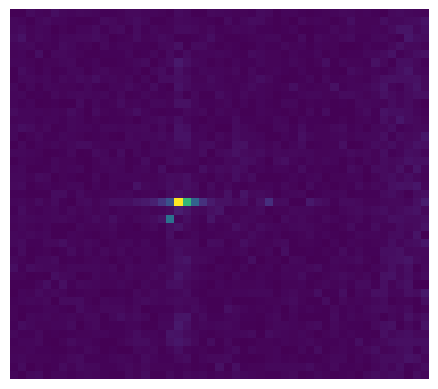

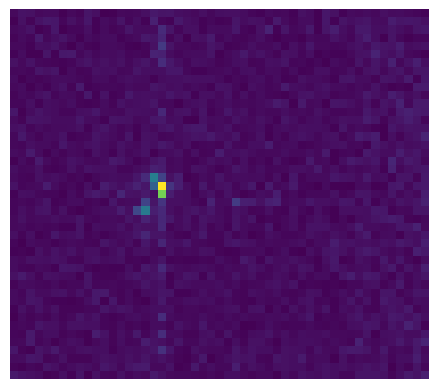

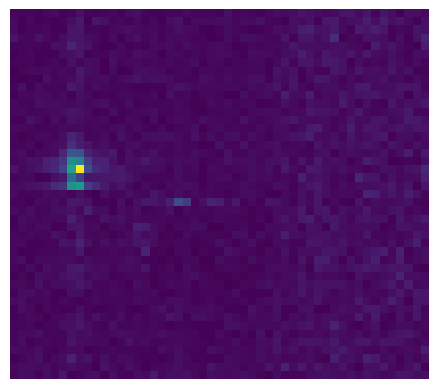

In [ ]:
train_folder = '/content/x_train/train_data_unlabeled'
test_folder = '/content/x_test/test_data_unlabeled'

# Print some images
train_files_part = os.listdir(train_folder)[:3]
for file in train_files_part:
    img_path = os.path.join(train_folder, file)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

**Open the files for Chadene**

In [ ]:
csv_path = '/content/drive/MyDrive/Machine_learning/Final_project_Data/y_train.csv'

y_train_df = pd.read_csv(csv_path)

print(y_train_df.head())


   id  target
0   0       0
1   1       1
2   2       0
3   3       2
4   4       2


**Open the files for Sacha**

In [ ]:
csv_path = '/content/drive/MyDrive/Mobilités/Machine Learning/Final Project/y_train.csv'

y_train_df = pd.read_csv(csv_path)

print(y_train_df.head())

   id  target
0   0       0
1   1       1
2   2       0
3   3       2
4   4       2


In [ ]:
train_files = os.listdir(train_folder)

train_file_paths = [os.path.join(train_folder, file) for file in train_files]


y_train = y_train_df['target']


X_train = []
for file_path in train_file_paths:
    img = Image.open(file_path)
    img_array = np.array(img, dtype=np.float32) / 255.0
    img_array = img_array[:, :, :3]
    X_train.append(img_array)
X_train = np.array(X_train)


y_train_encoded = to_categorical(y_train, num_classes=4)



In [ ]:
X_train.shape

(16182, 45, 51, 3)

CNN model (Keras API)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(45, 51, 3)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))


In [ ]:
loss = 'categorical_crossentropy'
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']
learning_rate = 0.001

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=1000, validation_split = 0.2)
model.summary()

Epoch 1/5
13/13 [==============================] - 46s 4s/step - loss: 1.3399 - accuracy: 0.3289 - val_loss: 1.3329 - val_accuracy: 0.3457
Epoch 2/5
13/13 [==============================] - 45s 4s/step - loss: 1.3382 - accuracy: 0.3292 - val_loss: 1.3336 - val_accuracy: 0.3457
Epoch 3/5
13/13 [==============================] - 40s 3s/step - loss: 1.3367 - accuracy: 0.3321 - val_loss: 1.3340 - val_accuracy: 0.3460
Epoch 4/5
13/13 [==============================] - 40s 3s/step - loss: 1.3372 - accuracy: 0.3278 - val_loss: 1.3366 - val_accuracy: 0.3429
Epoch 5/5
13/13 [==============================] - 48s 4s/step - loss: 1.3365 - accuracy: 0.3349 - val_loss: 1.3348 - val_accuracy: 0.3426
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 43, 49, 32)        896       
                                                                 
 max_pooling2d (MaxPo

**Utilisation CNN Package PyTorch**

In [ ]:
# Créer un DataLoader pour vos données d'entraînement
# Assurez-vous d'adapter les transformations en fonction de vos besoins
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionner les images à la taille attendue par le modèle
    transforms.ToTensor(),  # Convertir les images en tenseurs
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normaliser les tenseurs
])

# Charger les données d'entraînement
train_dataset = YourDataset(X_train, y_train, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

# Charger un modèle de classification pré-entraîné (par exemple, ResNet)
model = models.resnet18(pretrained=True)

# Remplacer la dernière couche (couche de sortie) du modèle pour s'adapter à votre tâche de classification
num_features = model.fc.in_features
model.fc = torch.nn.Linear(num_features, 4)  # 4 classes pour la classification

# Mettre le modèle en mode d'évaluation
model.eval()

# Boucle d'entraînement (exemple)
for images, labels in train_loader:
    # Prétraiter les images
    images = remove_alpha(images)
    images = transform(images)

    # Forward pass
    outputs = model(images)

    # Calcul de la perte, mise à jour des poids, etc.

NameError: name 'YourDataset' is not defined

**Utilisation VGG16**
Voir Tutoriel "https://builtin.com/machine-learning/vgg16"

In [ ]:
modelVGG16 = Sequential()
modelVGG16.add(Conv2D(input_shape=(45,51,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
modelVGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelVGG16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelVGG16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

modelVGG16.add(Flatten())
modelVGG16.add(Dense(units=4096,activation="relu"))
modelVGG16.add(Dense(units=4096,activation="relu"))
modelVGG16.add(Dense(units=4, activation="softmax"))

In [ ]:
opt = Adam(lr=0.001)
modelVGG16.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
modelVGG16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 45, 51, 64)        1792      
                                                                 
 conv2d_16 (Conv2D)          (None, 45, 51, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 22, 25, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 22, 25, 128)       73856     
                                                                 
 conv2d_18 (Conv2D)          (None, 22, 25, 128)       147584    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 11, 12, 128)       0         
 g2D)                                                 

In [ ]:
plt.plot(histVGG16.history["acc"])
plt.plot(histVGG16.history['val_acc'])
plt.plot(histVGG16.history['loss'])
plt.plot(histVGG16.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

NameError: name 'histVGG16' is not defined

In [ ]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
#histVGG16 = modelVGG16.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])
histVGG16 = modelVGG16.fit(X_train, y_train_encoded,steps_per_epoch=10, validation_steps=10,epochs=1,callbacks=[checkpoint,early])


 1/10 [==>...........................] - ETA: 36:11 - loss: 1.3863 - accuracy: 0.2588